<a href="https://colab.research.google.com/github/PashaIanko/Kaggle.ParisHousingPrices/blob/target_preprocessing/4_model_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
from google.colab import drive
# Datasets
import pandas as pd
# Numerics
import numpy as np
# Plotting
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing & pipelines
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
# Data management
from sklearn.model_selection import train_test_split
# Other
import os

pd.set_option('display.max_columns', None)

In [3]:
%%capture
GIT_DOWNLOAD_PATH = 'https://raw.githubusercontent.com/PashaIanko/Sklearn-Utils/main/'
FILES_LIST = [
    'path_manager.py',
    'sklearn_transformers.py',
    'sklearn_utils.py',
    'model.py'
]
GDRIVE_PATH = '/content/gdrive/MyDrive/'
PREPROC_TRIAL = 2
MODELS_TRIAL = 1
COMPETITION_PATH = GDRIVE_PATH + 'ML/Competitions/10.ParisHousePrices/'
# --------------------------------------------------
try:
    from nbpep8.nbpep8 import pep8
except ModuleNotFoundError:
    !pip install pycodestyle
    !pip install --index-url https://test.pypi.org/simple/ nbpep8
from nbpep8.nbpep8 import pep8
# ---------------------------------------
def download_files(url_dict):
    for file, url in url_dict.items():
        print(f'Downloading {file}')
        !wget -O {file} {url} {file}
url_dict = {file: GIT_DOWNLOAD_PATH + file for file in FILES_LIST}
print('a')
download_files(url_dict)
# ---------------------------------------
import importlib
import path_manager
import sklearn_utils
import sklearn_transformers
import model
def reload_all(modules_list_):
    for module in modules_list_:
        importlib.reload(module)
MODULES_LIST = [
    path_manager,
    sklearn_utils,
    sklearn_transformers,
    model
]
reload_all(MODULES_LIST)
# ---------------------------------------
from path_manager import PathManager
from model import Model
from sklearn_utils import nan_statistics
from sklearn_utils import boxplot_regression
from sklearn_utils import get_correlated_attributes
from sklearn_utils import visualize_datasets_distributions
from sklearn_transformers import ColumnDropper
from sklearn_transformers import LogTransformer
# ---------------------------------------
from google.colab import drive
drive.mount('/content/gdrive')
manager = PathManager(
    competition_path=COMPETITION_PATH,
    preprocessing_trial=PREPROC_TRIAL,
    models_trial=MODELS_TRIAL
)
manager.setup_paths()

# Functions

In [15]:
from sklearn.metrics import mean_squared_error

def report_model(model, X, Y):
    preds = model.predict(X)
    print(
        mean_squared_error(
            y_pred=preds,
            y_true=Y,
            squared=False
        )
    )

# Download the data

In [6]:
os.listdir(manager.data_trial_path)

['train_processed.csv',
 'val_processed.csv',
 'test_processed.csv',
 'submission_processed.csv',
 'submission_elastic_20_10_23.csv',
 'rfr_20_10_23.csv']

In [10]:
df_train = pd.read_csv(f'{manager.data_trial_path}/train_processed.csv', index_col=0)
df_val = pd.read_csv(f'{manager.data_trial_path}/val_processed.csv', index_col=0)
df_test = pd.read_csv(f'{manager.data_trial_path}/test_processed.csv', index_col=0)
df_submission = pd.read_csv(f'{manager.data_trial_path}/submission_processed.csv', index_col=0)

In [11]:
X_train, Y_train = df_train.iloc[:, :-1], df_train.iloc[:, -1]
X_val, Y_val = df_val.iloc[:, :-1], df_val.iloc[:, -1]
X_test, Y_test = df_test.iloc[:, :-1], df_test.iloc[:, -1]
X_submission = df_submission.iloc[:, :]

Xs = [
    X_train,
    X_val,
    X_test,
    X_submission
]

Ys = [
    Y_train,
    Y_val,
    Y_test,
    None
]

# Download the models

In [5]:
models = manager.load_models(
    ['RF', 'ElasticNet']
)

In [12]:
models

{'RF': RandomForestRegressor(n_estimators=200),
 'ElasticNet': ElasticNet(alpha=0.5, l1_ratio=1.0, random_state=255, warm_start=True)}

# Visualize models' predictions

In [16]:
report_model(models['RF'], X_train, Y_train)
report_model(models['RF'], X_val, Y_val)

3648.6598115769893
9998.503683088782


In [17]:
report_model(models['ElasticNet'], X_train, Y_train)
report_model(models['ElasticNet'], X_val, Y_val)

9400.092574169268
10617.980993893025


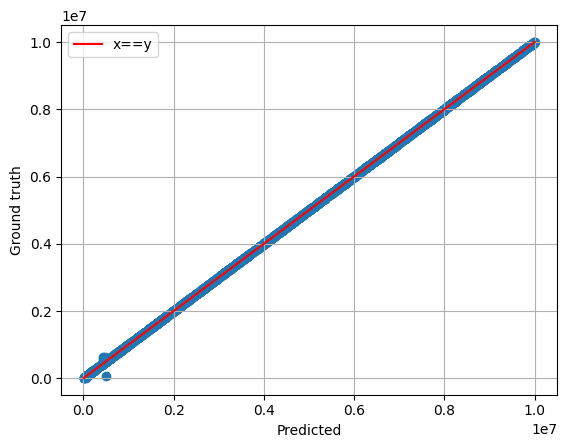

In [28]:
def visualize_predictions(model, X, Y):
    fig, ax = plt.subplots()
    predictions=model.predict(X)
    ax.scatter(x=predictions, y=Y)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Ground truth')

    max_val = max(np.max(predictions), np.max(Y))
    min_val = min(np.min(predictions), np.min(Y))

    ax.plot(np.linspace(min_val, max_val, 50), np.linspace(min_val, max_val, 50), color='red', label='x==y')
    ax.grid()
    ax.legend()

visualize_predictions(
    models['RF'],
    X_val,
    Y_val,
)

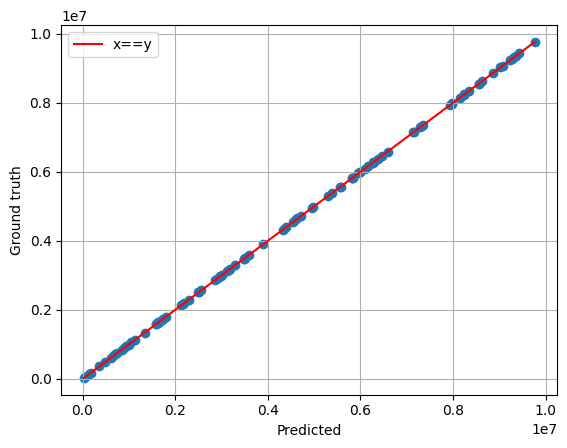

In [29]:
visualize_predictions(
    models['ElasticNet'],
    X_train[:100],
    Y_train[:100],
)